# AirBnB Dataset Exploration 
## by Aayush Soni

## Introduction
The dataset consists of three separate tables :
> * calendar.csv : This holds data of the various times a rental unit was used and its related data
> * listings.csv : This holds data of each rental unit as well as information on the host
> * reviews.csv : This holds data of reviews give each time a unit was rented. This dataset is not used in the analysis.

In our analysis we will try to answer these questions:
> * Which house is the most popular type in each area?
> * When does each house have the highest price?
> * What features help determine the house price, i.e. can we suggest an optimal price point for a give rental unit?

The information of most important columns used in each dataset is given below:
> *calendar.csv*
> * **listing_id** : Unique identifer for rental unit
> * **date** : When the unit was rented (datetime)
> * **available** : whether unit was rented on that date ( boolean)
> * **price** : Price per day for rental (float)

> *listings.csv*
> * **id** : Unique identifer for rental unit
> * **host_response_time** : response time for host ( categorical data)
> * **host_response_rate** : response rate of host ( percentage)
> * **host_is_superhost** : Whether host is a superhost or not (boolean)
> * **neighbourhood_cleansed** : neighborhood of the unit. Some preliminary processing has been applied to it
> * **zipcode** : Zip code of the unit
> * **property_type** : type of unit, e.g. apartment, house, tent, etc.
> * **acomodates** : number of people for default charges
> * **bathrooms** : number of bathrooms available
> * **bedroons** : number of bedrooms
> * **amenities** : list of amenities available in the unit
> * **price** : cost (USD) per night
> * **review_scores_rating** : unit review out of 5

We explore the following questions in section 2:
> * What is the distribution of houses in each zipcode?
> * What is the distribution of prices for each property type?
> * How does the price of each type of property vary with time?
> * What is the distribution of properties across Seattle?
> * What is the distribution of revenue across Seattle?
> * What is the proportion of property type in each neighbourhood group?
> * What is the proportion of revenue generated by each property type in each neighbourhood group?
> * What the the total revenue per neighbourhood ?
> * What is the distribution of revenue by Neighbourhood and property type?

To built the ML model we need to
> * Determine correlation of price with other features
> * Perform some additional data cleaning
> * Built a ML model ( I have selected a Linear Regression Model)
> * Determine R2 Score / average error in prediction
> * Determine which features best predict proerty price per night.


## 1. Preliminary Wrangling

In [1]:
## Initial imports and data loading
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import preprocessing

df_calendar=pd.read_csv('calendar.csv')
df_listings=pd.read_csv('listings.csv')
#df_reviews=pd.read_csv('reviews.csv')

import warnings
warnings.filterwarnings('ignore')


In [2]:
#Explore calendar
df_calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [3]:
df_calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1393570 entries, 0 to 1393569
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1393570 non-null  int64 
 1   date        1393570 non-null  object
 2   available   1393570 non-null  object
 3   price       934542 non-null   object
dtypes: int64(1), object(3)
memory usage: 42.5+ MB


We see that price is stored as an object. Price is NaN when 'available' field is 'f' i.e. False. 
Apart from price column, no data is missing.

In [4]:
#We will keep NaN price as negative
df_calendar.price = df_calendar.price.fillna("$-1.00").apply(lambda x : x[1:].replace(',','')).astype(float)

In [5]:
# Convert date column into datetime object
df_calendar.date = pd.to_datetime(df_calendar.date)

Now lets work on listings

In [6]:
df_listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [7]:
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Data columns (total 92 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3818 non-null   int64  
 1   listing_url                       3818 non-null   object 
 2   scrape_id                         3818 non-null   int64  
 3   last_scraped                      3818 non-null   object 
 4   name                              3818 non-null   object 
 5   summary                           3641 non-null   object 
 6   space                             3249 non-null   object 
 7   description                       3818 non-null   object 
 8   experiences_offered               3818 non-null   object 
 9   neighborhood_overview             2786 non-null   object 
 10  notes                             2212 non-null   object 
 11  transit                           2884 non-null   object 
 12  thumbn

Most of these are of no interest to us. Let's remove the columns we dont need..
E.g. -

> * .*URL - will not be used
> * City/state - equal for all values
> * square_Feet,license - most/ all NaN's

In [8]:
cols_to_remove=['listing_url','scrape_id','last_scraped', 'experiences_offered','thumbnail_url',
                'medium_url','picture_url','xl_picture_url','host_url','host_thumbnail_url','host_picture_url',
                'host_total_listings_count','city','state','market','smart_location','country_code','country',
                'calendar_last_scraped','requires_license','license','jurisdiction_names','square_feet','neighbourhood']

df_listings.drop(cols_to_remove,axis=1,inplace=True)

In [9]:
# What is the count of NaN's in each column?
(df_listings.isna().sum().sort_values(ascending=False)).head(30)


monthly_price                  2301
security_deposit               1952
weekly_price                   1809
notes                          1606
neighborhood_overview          1032
cleaning_fee                   1030
transit                         934
host_about                      859
host_acceptance_rate            773
review_scores_accuracy          658
review_scores_checkin           658
review_scores_value             656
review_scores_location          655
review_scores_cleanliness       653
review_scores_communication     651
review_scores_rating            647
last_review                     627
first_review                    627
reviews_per_month               627
space                           569
host_response_rate              523
host_response_time              523
host_neighbourhood              300
summary                         177
bathrooms                        16
host_location                     8
zipcode                           7
bedrooms                    

In [10]:
# Count NaN's
df_listings.zipcode.isna().sum()

7

These 7 missing zipcodes can be filled with zipcodes based on neighbourhood.
We will take the mode of each neighbourhood and use that as the sample for the missing zipcodes.
E.g. if a certain area 'Lake City' has 200 counts of a certain zipcode 98122, and one count of an NaN zipcode, we can be confident that the NaN in area X should be Z1. 

In [11]:
#USe most common area name to fill in the missing zip codes
f = lambda x: x.mode().iloc[0]
df_listings.zipcode = df_listings.zipcode.fillna(df_listings.groupby('neighbourhood_cleansed').transform(f).zipcode)

In [12]:
df_listings.zipcode.value_counts()

zipcode
98122        421
98103        394
98102        341
98105        225
98109        202
98101        201
98144        201
98121        196
98107        181
98115        178
98112        167
98117        164
98118        154
98119        145
98116        112
98104         95
98125         71
98199         66
98126         63
98106         58
98108         56
98133         46
98136         44
98177         19
98178          7
98146          5
98134          5
99\n98122      1
Name: count, dtype: int64

We see some data error for one of the zipcodes... It's likely 98112, but lets check and verify that using the other columns

In [13]:
#df_listings.loc[df_listings.zipcode=='99\n98122']
print("Neighbourhood of erroneous zipcode is :\n ",df_listings.loc[df_listings.zipcode=='99\n98122']['neighbourhood_cleansed'])
df_listings.loc[df_listings.neighbourhood_cleansed=='Minor'].groupby('zipcode').id.count()

Neighbourhood of erroneous zipcode is :
  859    Minor
Name: neighbourhood_cleansed, dtype: object


zipcode
98122        133
98144          1
99\n98122      1
Name: id, dtype: int64

Since zipcode of "Minor" is 98122 by a large margin, we can safely say thats what it likely was

In [14]:
df_listings.zipcode = df_listings.zipcode.str.split('\n').str[-1]


In [15]:
#Cleanup of other columns
df_listings.price = df_listings.price.apply(lambda x :x[1:].replace(',','')).astype(float)
df_listings.first_review = pd.to_datetime(df_listings.first_review)
df_listings.last_review = pd.to_datetime(df_listings.last_review)

## 2. Data Analysis
### 2.1 What is the distribution of houses in each zipcode?

In [16]:
#Number of listings per neighbourhood
df_listings.groupby('neighbourhood_cleansed').id.count().sort_values(ascending=0)


neighbourhood_cleansed
Broadway             397
Belltown             234
Wallingford          167
Fremont              158
Minor                135
                    ... 
Arbor Heights          5
South Beacon Hill      4
Pinehurst              4
South Park             3
Roxhill                2
Name: id, Length: 87, dtype: int64

In [17]:
#Number of each property type
df_listings.groupby('property_type').id.count().sort_values(ascending=0)

property_type
House              1733
Apartment          1708
Townhouse           118
Condominium          91
Loft                 40
Bed & Breakfast      37
Other                22
Cabin                21
Bungalow             13
Camper/RV            13
Boat                  8
Tent                  5
Treehouse             3
Chalet                2
Dorm                  2
Yurt                  1
Name: id, dtype: int64

### 2.2 What is the distribution of prices for each property type? 

[Text(0.5, 0, 'Price per night (USD)'), Text(0, 0.5, 'Property Type')]

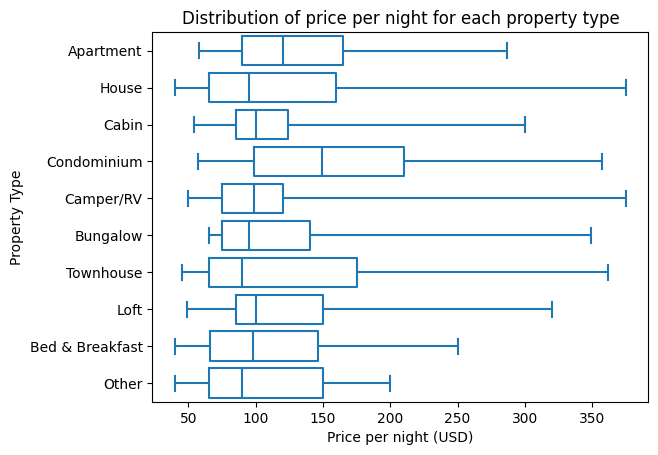

In [18]:
# Create a merged dataset of calendar data with listing data to capture proerty type information
df_prop = pd.merge(df_calendar,df_listings[['property_type','id','zipcode']],left_on='listing_id',right_on='id').drop('id',axis=1)
#Select 10 most populous property types for further analysis
prop_type_order=df_listings.groupby('property_type').id.count().sort_values(ascending=0).head(10).index

ax = sns.boxplot(data = df_prop.loc[df_prop.price > 0].loc[df_prop.property_type.isin(prop_type_order)], 
            y='property_type', x='price', whis=(5,95), showfliers=False, fill=False);

ax.set_title('Distribution of price per night for each property type')
ax.set(xlabel='Price per night (USD)', ylabel='Property Type')


All properties have a similar and very narrow price band for 25-75 percentile, with a median price of ~USD100 (except Condos with a median price ~USD150)


### 2.3 How does the price of each type of property vary with time?

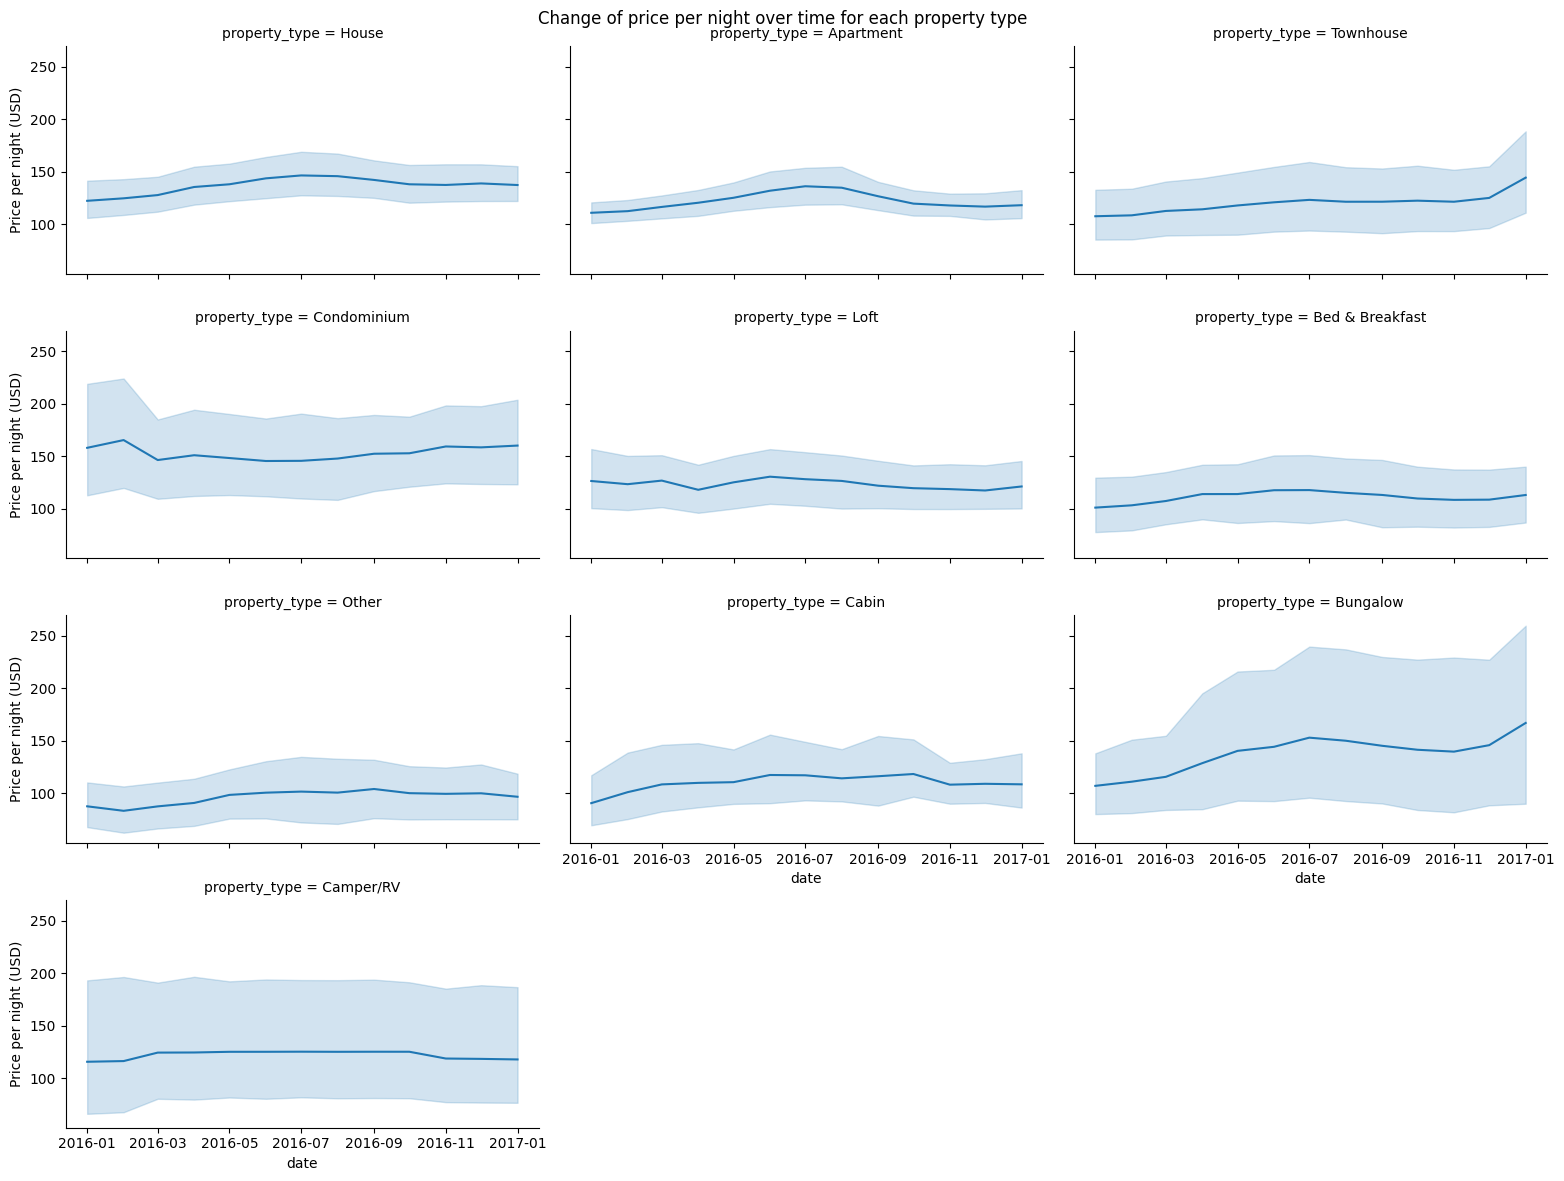

In [19]:
#create a table of listing id -> property_type
# we will select the 25 most populous zip codes
zip_count = 25
zipcode_of_interest=df_listings.groupby('zipcode').id.count().sort_values(ascending=0).head(zip_count).index.tolist()

# Create a new DF that merges listings with property information
#df_prop = pd.merge(df_calendar,df_listings[['property_type','id','zipcode']],left_on='listing_id',right_on='id').drop('id',axis=1)
df_prop['year']=df_prop.date.dt.year
df_prop['month']=df_prop.date.dt.month

#group by month and zipcode, find mean price
df_prop = df_prop.loc[df_prop.price>0].groupby(['year','month','property_type','zipcode'],as_index=False).price.mean()
df_prop['date']=pd.to_datetime(df_prop.year.astype(str)+'-'+df_prop.month.astype(str),format='%Y-%m')

g = sns.FacetGrid(data=df_prop.loc[df_prop['zipcode'].isin(zipcode_of_interest)],col='property_type',col_order=prop_type_order,col_wrap=3, aspect=1.75)

g.map(sns.lineplot,'date','price')

g.fig.suptitle('Change of price per night over time for each property type')
g.fig.subplots_adjust(top=.95)
#g.set(ylabel='Price per night (USD)', xlabel='Month')
g.set(ylabel='Price per night (USD)')

### 2.4 What is the distribution of properties across Seattle?

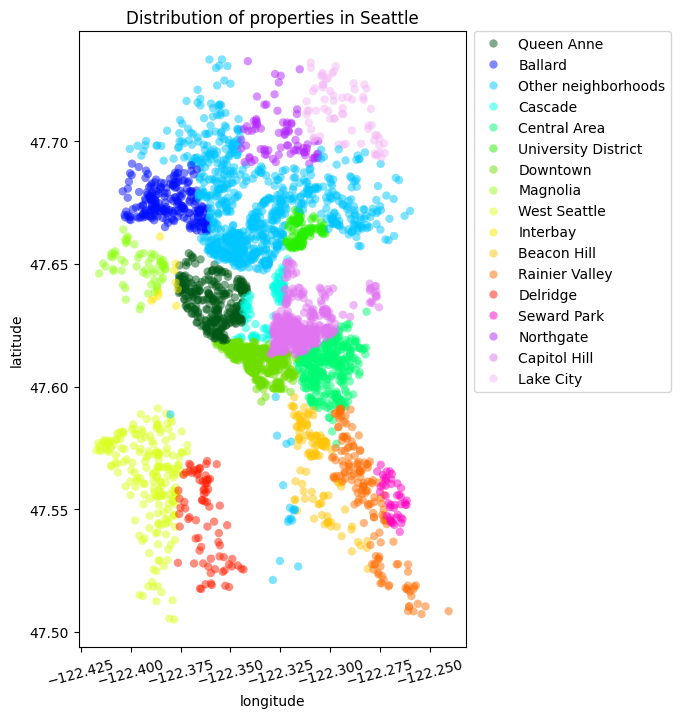

In [20]:
fig,axes= plt.subplots(1,1,figsize=(5,8))
pal='gist_ncar'
sns.scatterplot(data=df_listings,y='latitude',x='longitude',hue='neighbourhood_group_cleansed',palette=pal,linewidth=0,alpha=0.5)
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0);
plt.title('Distribution of properties in Seattle')
plt.xticks(rotation=15);

### 2.5 What is the distribution of revenue across Seattle?

In [21]:
#print('hi')
df_prop = pd.merge(df_calendar,df_listings[['property_type','id','latitude','longitude']],left_on='listing_id',right_on='id').drop('id',axis=1)
df_prop = df_prop.loc[df_prop.available=='t'].groupby(['latitude','longitude'],as_index=False).price.sum()
#sns.jointplot(data=df_prop, x='latitude', y='longitude',hue='price')
df_prop['Revenue USD']=(df_prop.price//5000)*5000
df_prop = df_prop.sort_values('Revenue USD')#.price.describe()


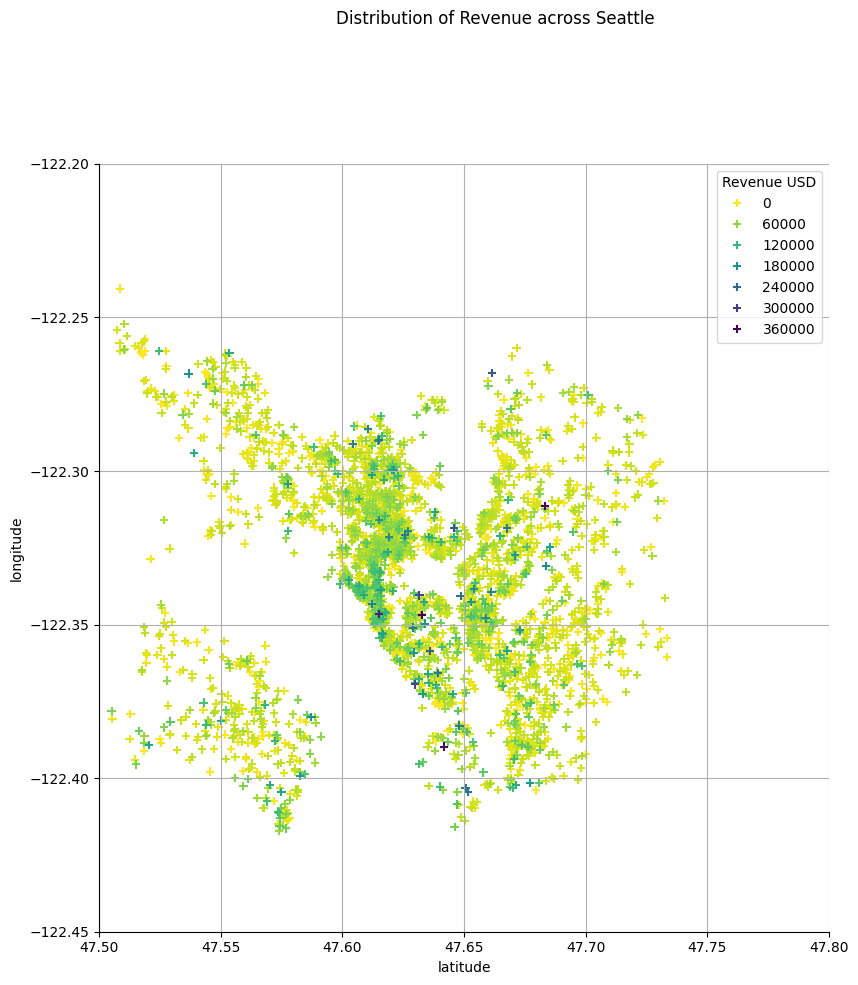

In [22]:
sns.set_style({'axes.grid' : True})

g = sns.jointplot(data=df_prop, x='latitude', y='longitude',hue='Revenue USD',kind='scatter',
                  palette='viridis_r',marker='+',height=10, linewidth=1.5,xlim=(47.5,47.8),ylim=(-122.45,-122.2))#linewidth=0,alpha=0.1)
#g.grid()
#sns.move_legend(g.ax_joint, "upper left", bbox_to_anchor=(1.25, 1))
g.fig.suptitle('Distribution of Revenue across Seattle')
g.ax_marg_x.remove()
g.ax_marg_y.remove()

### 2.6 What is the proportion of property type in each neighbourhood group?

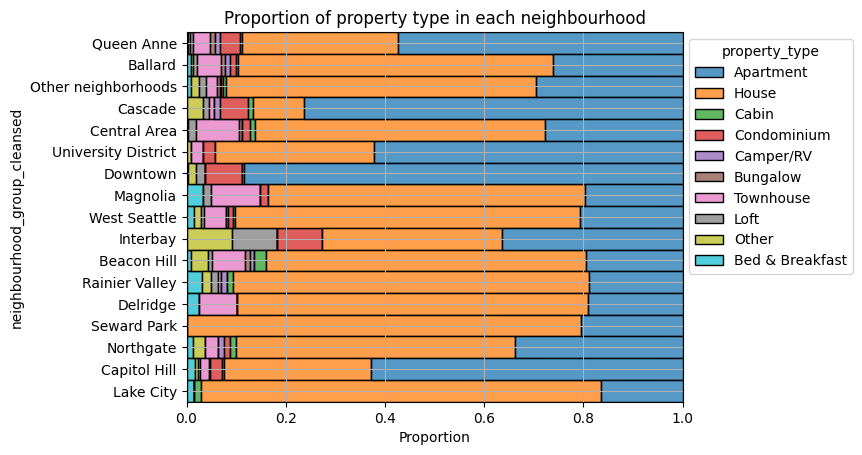

In [23]:
#df_listings.groupby(['zipcode','property_type']).id.count()
#sns.countplot(data=df_listings,x='zipcode',stat='percent')
#df_listings.plot.bar()
df_listings_lesstypes=df_listings
df_listings_lesstypes.property_type=df_listings_lesstypes.property_type.apply(lambda x : x if x in prop_type_order else 'Other')
ax = sns.histplot(
    data=df_listings_lesstypes,#.loc[df_listings.property_type.isin(prop_type_order)],
    y='neighbourhood_group_cleansed',
    hue='property_type',
    multiple='fill',
    stat='proportion')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title('Proportion of property type in each neighbourhood');

### 2.7 What is the proportion of revenue generated by each property type in each neighbourhood group?

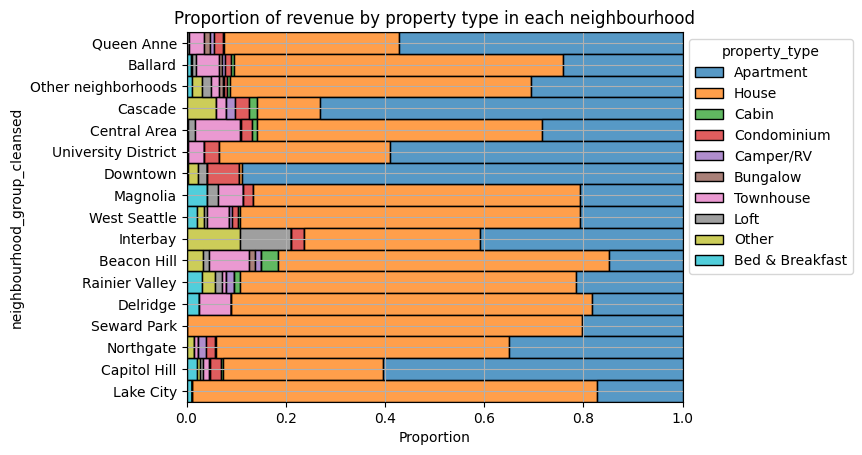

In [24]:
#df_id_nbr = df_listings[['neighbourhood_group_cleansed','id','property_type']].loc[df_listings.property_type.isin(prop_type_order)]
df_id_nbr = df_listings_lesstypes[['neighbourhood_group_cleansed','id','property_type']]

df_nbr = pd.merge(left=df_calendar,right=df_id_nbr,left_on='listing_id',right_on='id').drop(['id','date','listing_id'],axis=1)
df_nbr = df_nbr.loc[df_nbr.available=='t'].drop('available',axis=1)
#df_nbr = df_nbr.groupby(['neighbourhood_group_cleansed','property_type'],as_index=False).price.sum()

#sns.barplot(data=df_nbr,y='neighbourhood_group_cleansed',x='price')
ax = sns.histplot(
    data=df_nbr,
    y='neighbourhood_group_cleansed',
    hue='property_type',
    multiple='fill',
    stat='proportion')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
ax.set_title('Proportion of revenue by property type in each neighbourhood');


### 2.8 What the the total revenue per neighbourhood ?

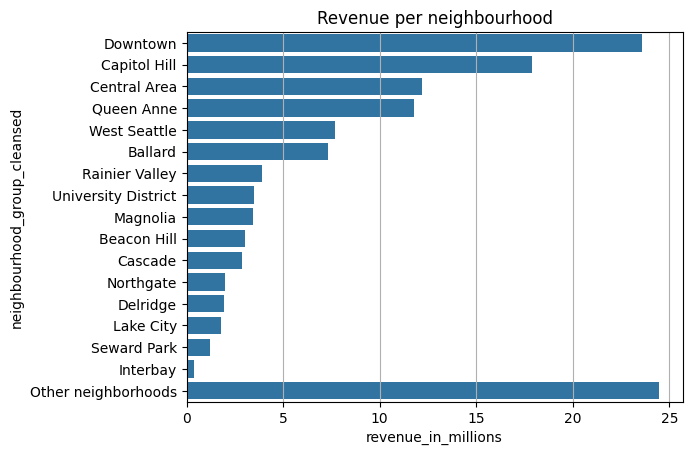

In [25]:
#df_listings.groupby('neighbourhood_cleansed').price.sum().sort_values(ascending=False)
#for i in df_listings.columns : print(i)
k = df_nbr.groupby('neighbourhood_group_cleansed',as_index=False).price.sum().sort_values(ascending=False,by='price')
k['revenue_in_millions']=k.price/1000000 # in millions
order = k.neighbourhood_group_cleansed.tolist()
ax = sns.barplot(data=k,
           y='neighbourhood_group_cleansed',x='revenue_in_millions', order = order[1:]+[order[0]])
ax.set_title('Revenue per neighbourhood');

### 2.9 What is the distribution of revenue by Neighbourhood and property type?

[Text(0.5, 0, 'Revenue in USD Millions')]

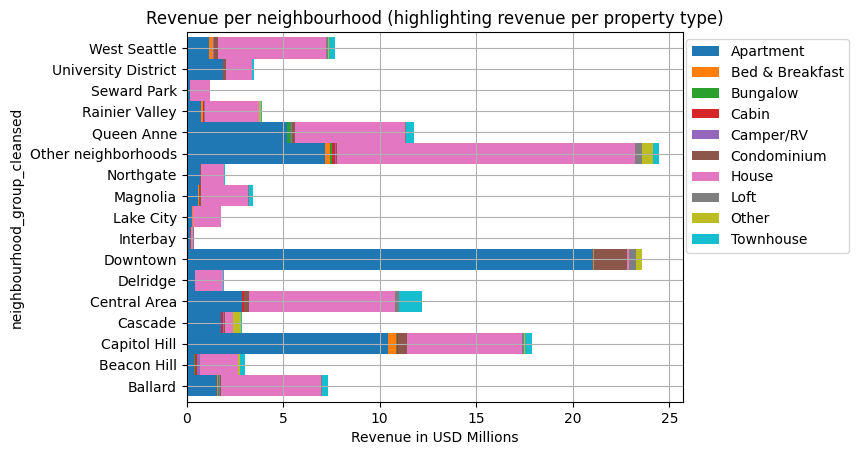

In [26]:
k1 = df_nbr.groupby(['neighbourhood_group_cleansed','property_type'],as_index=False).price.sum()
k1.price=k1.price/1000000
ax = pd.pivot(k1, index='neighbourhood_group_cleansed',columns=['property_type'], values='price').plot(kind='barh',
                                                                    linewidth=0,width=1,colormap='tab10',stacked=True)
ax.legend(bbox_to_anchor=(1.35, 1))
ax.set_title('Revenue per neighbourhood (highlighting revenue per property type)');
ax.set(xlabel='Revenue in USD Millions')

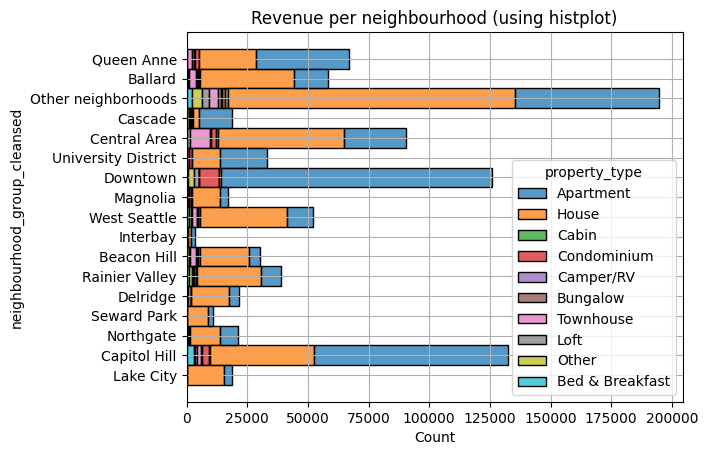

In [27]:
ax = sns.histplot(
    data=df_nbr,
    y='neighbourhood_group_cleansed',
    hue='property_type',
    multiple='stack',
    stat='count')

ax.set_title('Revenue per neighbourhood (using histplot)');

Now that we have cleaned dataset, we can start making predictions and try to create a model to determine optimal pricing per night for the properties

## 3 Building a model to predict optimal price based on property type, room type and available amenities.


### What is the correlation of the various features of properties?

Listings' amenities column is a column where each element holds a set of amenitis available. In this current form it is difficult to parse to determine whether a property has a particular amenity or not. 
Lets split this column into its constituent boolean features' columns.

In [28]:
l=set()
for i in df_listings.amenities.tolist():
    j=set(j for j in i[1:-1].split(',') if j)
    l=l.union(j)
l

{'"24-Hour Check-in"',
 '"Air Conditioning"',
 '"Buzzer/Wireless Intercom"',
 '"Cable TV"',
 '"Carbon Monoxide Detector"',
 '"Elevator in Building"',
 '"Family/Kid Friendly"',
 '"Fire Extinguisher"',
 '"First Aid Kit"',
 '"Free Parking on Premises"',
 '"Hair Dryer"',
 '"Hot Tub"',
 '"Indoor Fireplace"',
 '"Laptop Friendly Workspace"',
 '"Lock on Bedroom Door"',
 '"Other pet(s)"',
 '"Pets Allowed"',
 '"Pets live on this property"',
 '"Safety Card"',
 '"Smoke Detector"',
 '"Smoking Allowed"',
 '"Suitable for Events"',
 '"Washer / Dryer"',
 '"Wheelchair Accessible"',
 '"Wireless Internet"',
 'Breakfast',
 'Cat(s)',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'Essentials',
 'Gym',
 'Hangers',
 'Heating',
 'Internet',
 'Iron',
 'Kitchen',
 'Pool',
 'Shampoo',
 'TV',
 'Washer'}

In [29]:
for i in l:
    df_listings[i]=df_listings.amenities.apply(lambda x : i in x)
df_listings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3818 entries, 0 to 3817
Columns: 109 entries, id to Essentials
dtypes: bool(41), datetime64[ns](2), float64(15), int64(12), object(39)
memory usage: 2.1+ MB


price                           1.000000
accommodates                    0.652218
bedrooms                        0.627720
beds                            0.589525
bathrooms                       0.516424
guests_included                 0.392875
"Family/Kid Friendly"           0.259901
"Cable TV"                      0.237309
TV                              0.222488
reviews_per_month               0.218588
"Indoor Fireplace"              0.148466
"Air Conditioning"              0.130271
"Hot Tub"                       0.127066
Kitchen                         0.125024
number_of_reviews               0.124695
Washer                          0.120973
Doorman                         0.120872
Gym                             0.113757
"Pets live on this property"    0.111069
Dryer                           0.108310
Name: price, dtype: float64

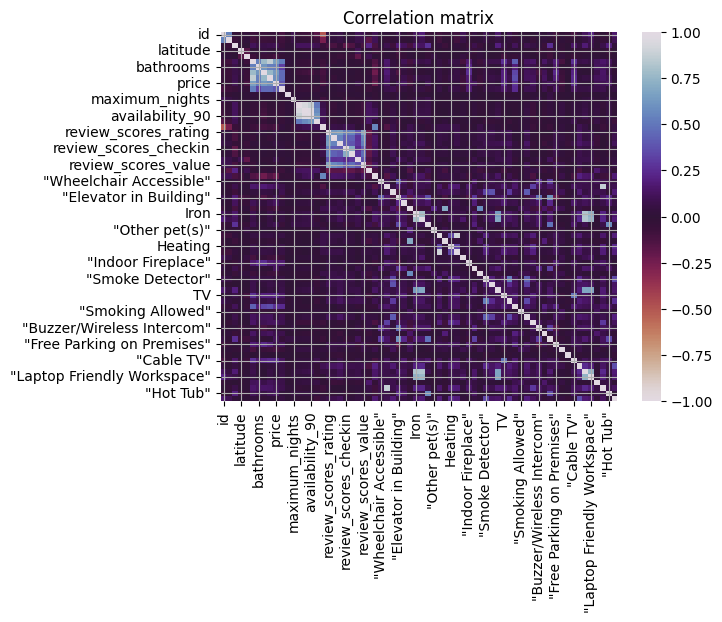

In [30]:
#Create a correlation matrix
c=df_listings.corr(numeric_only=True)

#Display as a heatmap
ax = sns.heatmap(c,cmap='twilight_r',center=0,vmin=-1,vmax=1);#,annot=True,fmt=".1f");
ax.set_title('Correlation matrix');
#sns.heatmap(c.abs(),cmap='viridis',vmin=0,vmax=1);#,annot=True,fmt=".1f");

df_listings.corr(numeric_only=True).price.abs().sort_values(ascending=False).head(20)

Create a predictor:

In [31]:
#predict based on below columns:
#host_response_time
#host_response_rate
#host_is_superhost
#zipcode
#property_type
#room_type
#accommodates
#bathrooms
#bedrooms
#beds
#all amenities columns, l

#Filter property types to include only 10 most popular ones.
df_listings_cleaned=df_listings.loc[df_listings.property_type.isin(prop_type_order)][['host_response_time',
                                'host_response_rate','host_is_superhost','zipcode','property_type','room_type',
                                'accommodates','bathrooms','bedrooms','beds','guests_included']+list(l)+['price']].dropna()

#Host reponse rate is a string, convert it into an integer
df_listings_cleaned.host_response_rate=df_listings_cleaned.host_response_rate.apply(lambda x : int(x[:-1]))
df_listings_cleaned.host_is_superhost= df_listings_cleaned.host_is_superhost.apply(lambda x : x=='t')
df_listings_cleaned.zipcode=df_listings_cleaned.zipcode.astype(int)


#Convert categorical features into onehot columns
df_listings_cleaned=pd.get_dummies(data=df_listings_cleaned, columns=['host_response_time','property_type','room_type'])

#Drop duplicates
df_listings_cleaned.drop_duplicates(inplace=True)

# Keep only delta of zipcode so numbers are smaller
# Technically zipcode should be an object not an integer, but this helps maintain a numeric interpretation of the data


df_X=df_listings_cleaned.drop('price',axis=1)
df_y=df_listings_cleaned['price']

df_X.zipcode = df_X.zipcode - df_X.zipcode.min() 


df_X.info()

#df_listings_cleaned.corr()['price'].abs().sort_values(ascending=False).head(40)
#sns.heatmap(data=c)

<class 'pandas.core.frame.DataFrame'>
Index: 3223 entries, 0 to 3817
Data columns (total 66 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   host_response_rate                     3223 non-null   int64  
 1   host_is_superhost                      3223 non-null   bool   
 2   zipcode                                3223 non-null   int32  
 3   accommodates                           3223 non-null   int64  
 4   bathrooms                              3223 non-null   float64
 5   bedrooms                               3223 non-null   float64
 6   beds                                   3223 non-null   float64
 7   guests_included                        3223 non-null   int64  
 8   "Wheelchair Accessible"                3223 non-null   bool   
 9   Washer                                 3223 non-null   bool   
 10  "First Aid Kit"                        3223 non-null   bool   
 11  "Elevator

In [32]:
#Split dataset into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size = .30, random_state=42)

In [33]:
#clf = svm.SVC()
clf = LinearRegression()
clf.fit(X_train, y_train)


LinearRegression()

In [34]:
y_test_preds = clf.predict(X_test)
y_train_preds = clf.predict(X_train)

test_score = r2_score(y_test, y_test_preds)
train_score = r2_score(y_train, y_train_preds)

y_preds = y_test_preds.tolist() + y_train_preds.tolist()
y_init = y_test.tolist() + y_train.tolist()


print(test_score)
print(train_score)

0.5165338364064267
0.6205387608535613


We observe an r2 score of 0.5 for test set.
Lets break it down by house type to see if we are better/worse at predicting particular house prices

In [35]:
# We will use this list to draw a graph of r2 score for each property type 
prop_type_pred=[]
prop_type_avg_err=[]

for pt in prop_type_order :
    df_house = df_listings_cleaned.loc[df_listings_cleaned['property_type_'+pt]==True]
   
    df_X=df_house.drop('price',axis=1)
    df_X.host_is_superhost= df_X.host_is_superhost.apply(lambda x : x=='t')
    df_X.zipcode=df_X.zipcode.astype(int)
    df_X.zipcode = df_X.zipcode - df_X.zipcode.min() 
    
    df_y=df_house['price']
    
    y_test_preds = clf.predict(df_X)
    prop_type_pred.append(r2_score(df_y,y_test_preds))
    prop_type_avg_err.append(((df_y-y_test_preds).abs()/df_y).mean())
    



Text(0.5, 0, 'Blue - R2 Score; Orange - Mean error ratio (1 = 100%)')

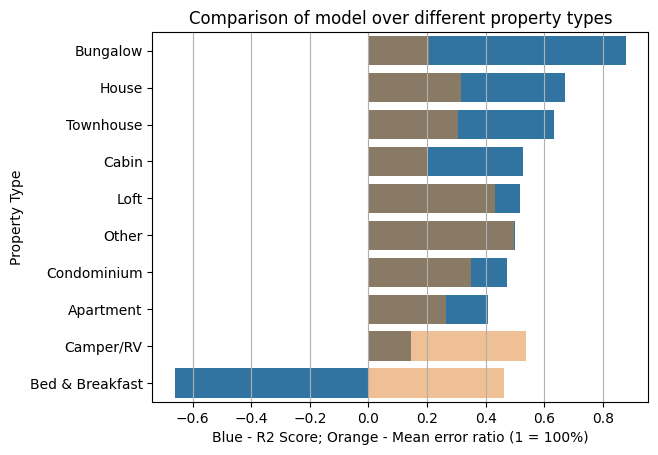

In [36]:
df_pred=pd.DataFrame([ [i,j] for i,j in zip(prop_type_order,prop_type_pred)], columns=['Property Type', 'R2 Score'])
df_pred=df_pred.sort_values(by='R2 Score',ascending=False)
sns.barplot(data=df_pred,y='Property Type',x='R2 Score')

df_pred=pd.DataFrame([ [i,j] for i,j in zip(prop_type_order,prop_type_avg_err)], columns=['Property Type', 'Mean error'])
df_pred=df_pred.sort_values(by='Mean error',ascending=False)
sns.barplot(data=df_pred,y='Property Type',x='Mean error',alpha=0.5)
plt.title('Comparison of model over different property types');
plt.xlabel('Blue - R2 Score; Orange - Mean error ratio (1 = 100%)')


Our model is very well equipped at predicting prices for Bungalows, Houses and Townhouses, but is remarkably inept at predicting the prices for  Bed & Breakfasts, and Campers. Apartments are one of the major type of properties listed in Seattle however it only has an r2 score of 0.4.

The average error is very high for B&B, RV, Condos, Lofts and 'Other' types of properties.
Our model does an alright job at predicting the price point for Bungalows, Cabins, and Apartments.

Text(0.5, 1.0, 'Actual price v/s predicted price for listings')

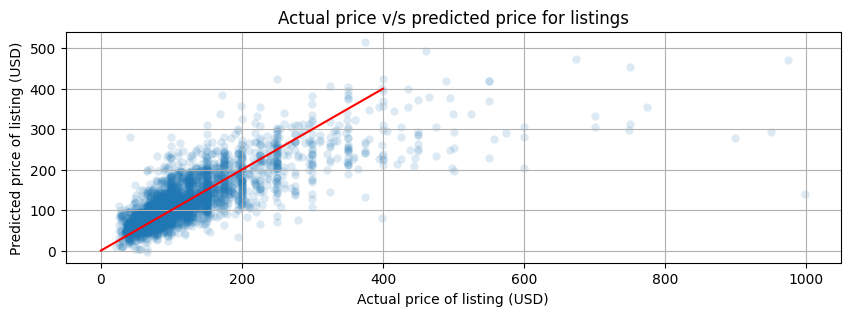

In [37]:
fig, ax = plt.subplots(figsize=(10,3))
sns.scatterplot(x=y_init,y=y_preds,linewidth=0,alpha=0.15) ;
plt.xlabel('Actual price of listing (USD)')
plt.ylabel('Predicted price of listing (USD)')
plt.plot([0,400],[0,400],c='r')
plt.title('Actual price v/s predicted price for listings')

On plotting expected v/s prdicted prices we make the following observations:
> * The lower priced listings have a better prediction, with predictions being slightly higher than actual prices
> * The higher priced listings ( prices > USD400) have a much worse prediction, with predictions being far lower than actual prices
> * We can notice a clear banding in prices around USD 200/250/300/350. There is likely some features that are missed from our model due to which it is unable to price these appropriately.

### What features best predict the price of a property?

In [38]:
coefs_df = pd.DataFrame()
coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = clf.coef_
coefs_df['abs_coefs'] = abs(clf.coef_)
coefs_df = coefs_df.sort_values('abs_coefs', ascending=False)
coefs_df.head(20)
#pd.DataFrame([X_train.columns,clf.coef_]

,est_int,coefs,abs_coefs
24,Doorman,42.084688,42.084688
63,room_type_Entire home/apt,37.415462,37.415462
65,room_type_Shared room,-33.610346,33.610346
4,bathrooms,31.272070,31.272070
5,bedrooms,29.235644,29.235644
40,"""Washer / Dryer""",-28.149754,28.149754
60,property_type_Loft,24.130538,24.130538
61,property_type_Other,-23.483165,23.483165
47,"""Hot Tub""",16.560659,16.560659
57,property_type_Camper/RV,14.965873,14.965873


The features with the highest weightage on predicting prices are
> * **Room Type**
>     * Whether it is Entire property or Shared room
> * **Amenities available**
>     * doorman
>     * washing machine/ dryer
>     * hot tub
>     * internet
>     * Elevator
>     * Air Conditioning
> * **Number of bedrooms/bathrooms**
> * **Property Type**
>     * Loft, Bungalow and Cabin seem to have the biggets effect


## Conclusion
The given data has painted a picture of AirBnB's Seattle statistics. We have discovered that:
> * By far the most popular property types are Apartments and Houses
> * Prices for different property types are fairly consistent with 25-75 percentile scores around USD100. However all properties have major outliers in terms of price-per-night being on the higher side.
> * Apartments and Houses show an increase in prices around the middle of the year, while the prices of other types of properties are fairly consistent
> * By far the most popular property types are Apartments and Houses
> * Most places (by coordinate) have a rather uniform revenue, however a few places stand out with revenues > USD 360,000 over the year
> * Downtown, Capitol Hill, Central Area and Queen Anne are the most revenue-generating neighbourhoods of Seattle. The former two are unique among the neighbourhoods as being the only two places where the majority of revenue is generated by apartments.
> * The features that best determine a properties' price-per-night include room type, size of the house (i.e. number of bedrooms and bathrooms), property type, and certain amenities available.